In [1]:
%load_ext autoreload
%autoreload 2

import os
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import Pk_library as PKL
from copy import deepcopy
mpl.style.use('style.mcstyle')


In [2]:
from cmass.bias.apply_hod import load_snapshot

In [9]:
wdir = '/anvil/scratch/x-mho1/cmass-ili'
suite='abacuslike'
L, N = 2000, 256
a = 0.666660
lhid=0

ddir = join(wdir, suite, 'fastpm', f'L{L}-N{N}', str(lhid))
fpos, fvel, fmass, fmeta = load_snapshot(ddir, a)

ddir = join(wdir, suite, 'pinocchio', f'L{L}-N{4*N}', str(lhid))
ppos, pvel, pmass, pmeta = load_snapshot(ddir, a)

print(len(pmass), len(fmass))

2624838 945459


In [10]:
Nkeep = 900_000
argmask = np.argsort(pmass)[::-1][:Nkeep]
ppos, pvel, pmass = ppos[argmask], pvel[argmask], pmass[argmask]

argmask = np.argsort(fmass)[::-1][:Nkeep]
fpos, fvel, fmass = fpos[argmask], fvel[argmask], fmass[argmask]

In [11]:
fhist, _ = np.histogramdd(
    fpos, bins=(N, N, N), range=((0, L), (0, L), (0, L))
)
phist, _ = np.histogramdd(
    ppos, bins=(N, N, N), range=((0, L), (0, L), (0, L))
)

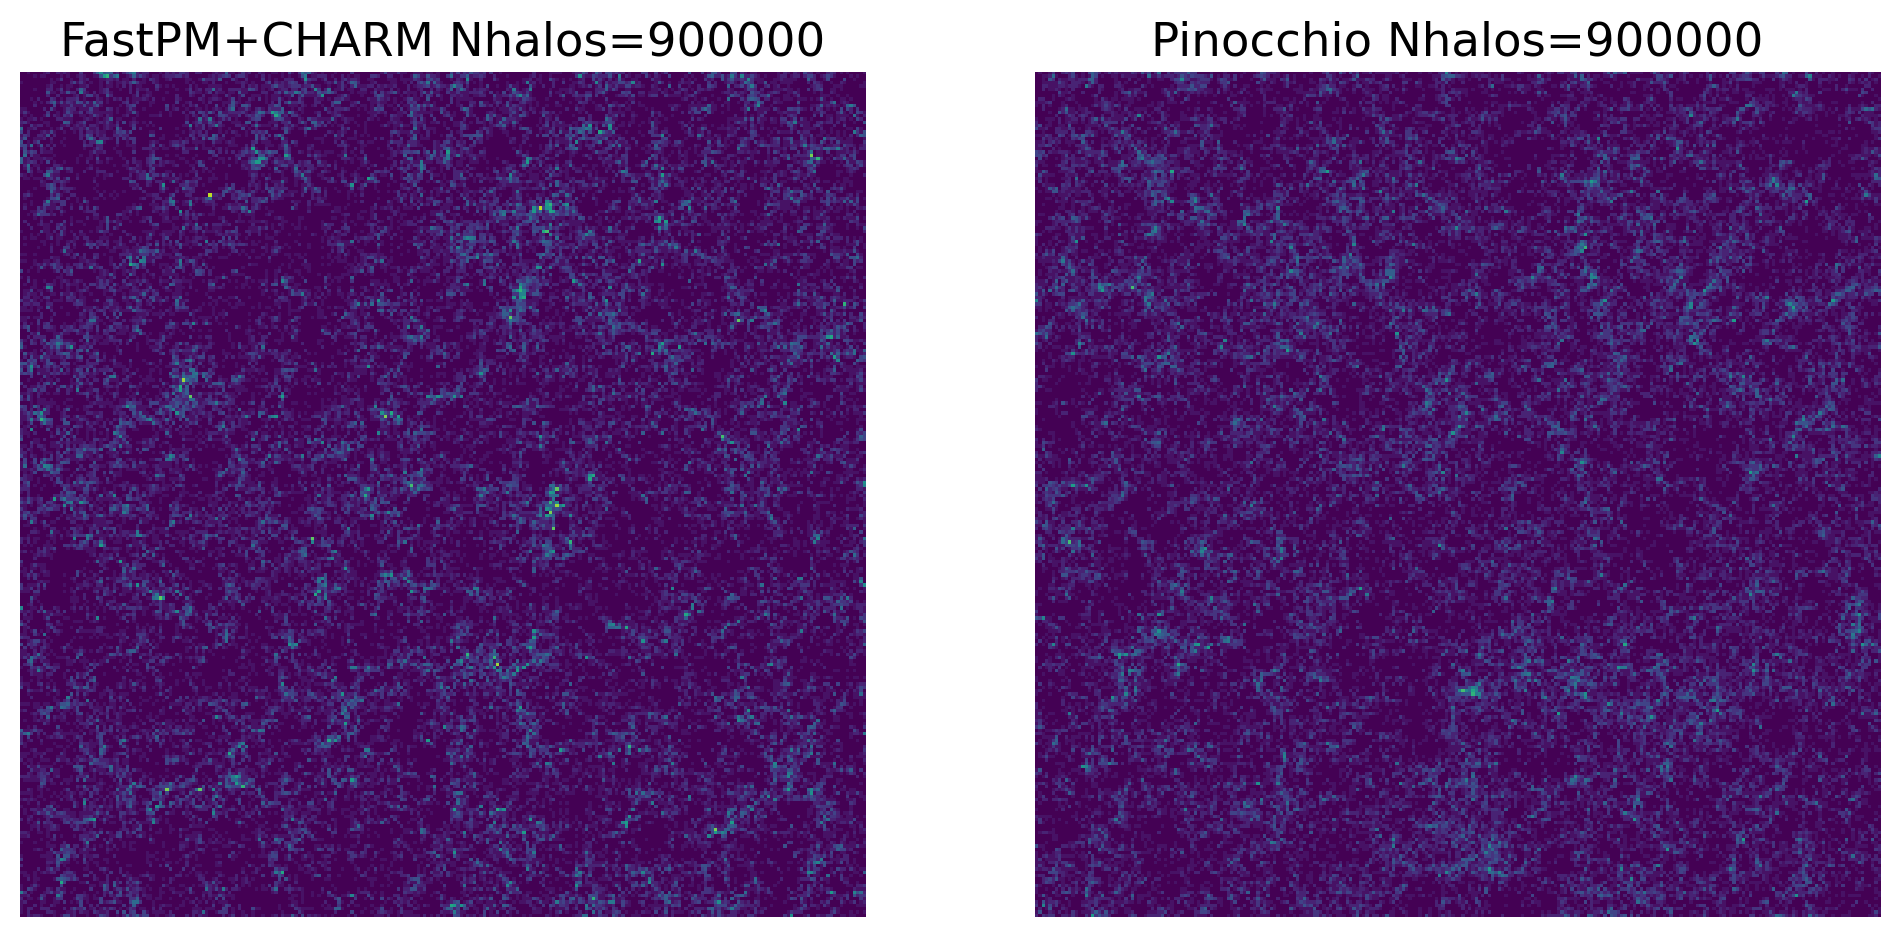

In [12]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))

ax = axs[0]
ax.imshow(fhist[:20].sum(axis=0), origin='lower', cmap='viridis',
          vmin=0, vmax=20)
ax.set_title(f'FastPM+CHARM Nhalos={len(fmass)}')

ax = axs[1]
ax.imshow(phist[:20].sum(axis=0), origin='lower', cmap='viridis',
          vmin=0, vmax=20)
ax.set_title(f'Pinocchio Nhalos={len(pmass)}')

for ax in axs:
    ax.axis('off')

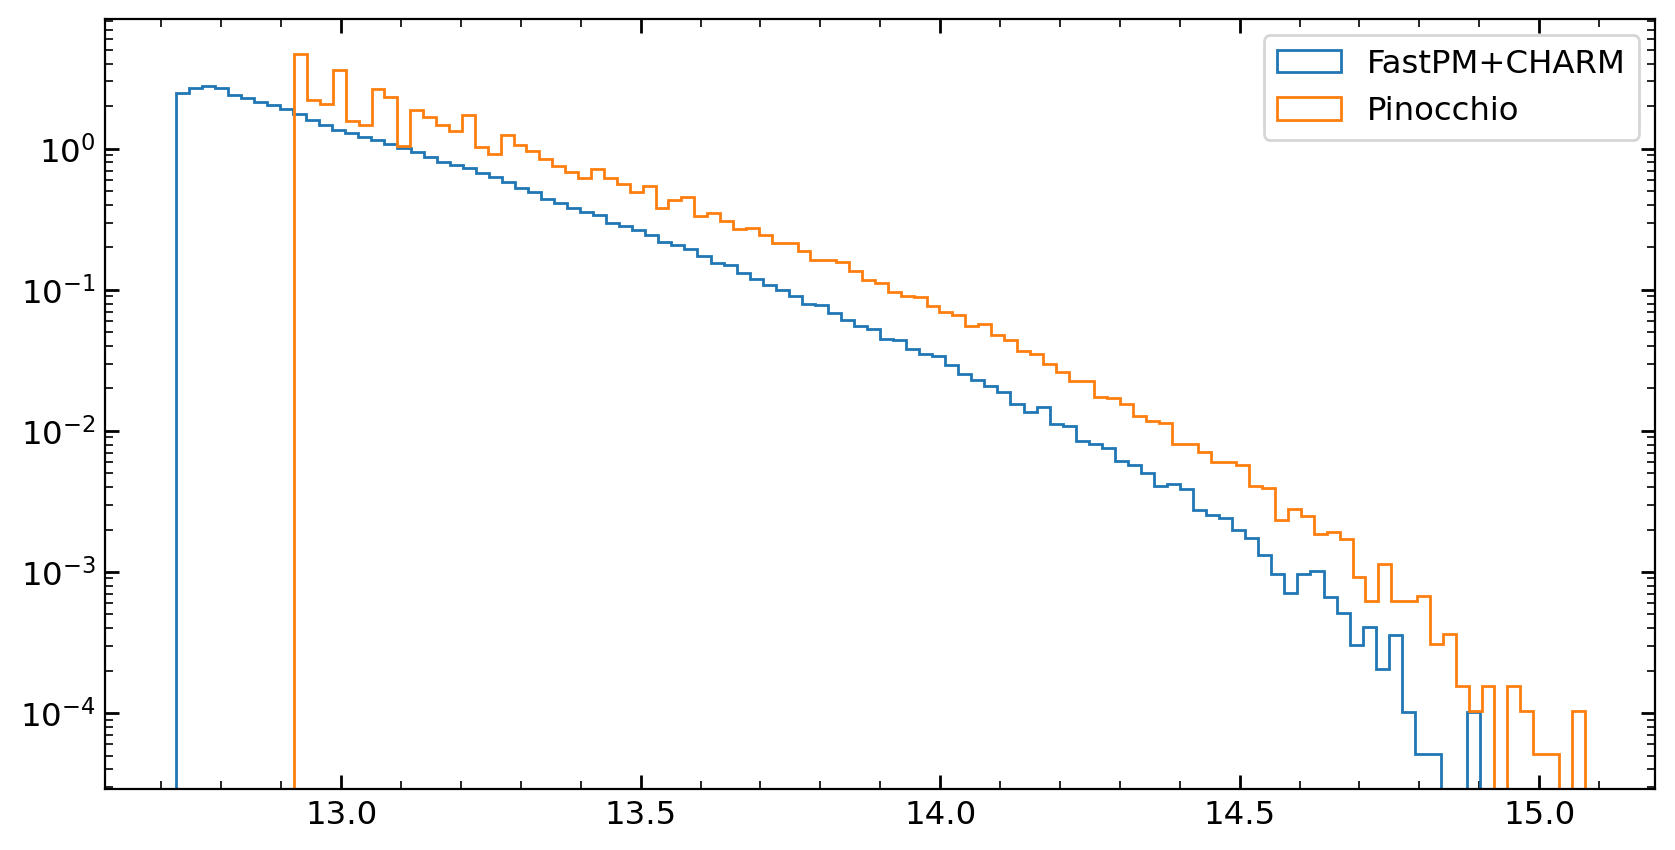

In [13]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.semilogy()
ax.hist(fmass, bins=100, histtype='step', label='FastPM+CHARM', density=True);
ax.hist(pmass, bins=100, histtype='step', label='Pinocchio', density=True);
ax.legend()